<a href="https://colab.research.google.com/github/aqsa-isha/CodexCue-Simple-Linear_Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and read the data
data = pd.read_csv('/content/dataset.csv')

## Understanding the Dataset

In [3]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# Display first five rows of dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Display last five rows of dataset
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
# Shape of dataset
data.shape

(244, 7)

In [8]:
# Check the type of data
data.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [9]:
# Data contain categorical variables
categorical_columns = ['sex', 'smoker', 'day', 'time']
transformed_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
transformed_data

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [10]:
# Check for null values
transformed_data.isnull().sum()

,0
total_bill,0
tip,0
size,0
sex_Male,0
smoker_Yes,0
day_Sat,0
day_Sun,0
day_Thur,0
time_Lunch,0


In [11]:
# Description of dataset
transformed_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
len(transformed_data)

244

## Data Visualization

<ipython-input-13-12ea897442a5>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data['total_bill'], transformed_data['tip'], cmap='viridis', s=100, alpha=0.7, edgecolor='black')


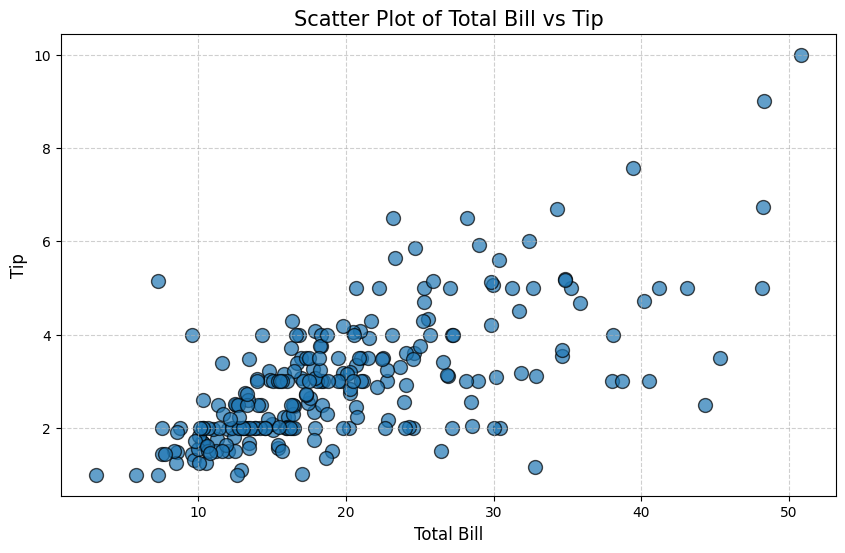

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data['total_bill'], transformed_data['tip'], cmap='viridis', s=100, alpha=0.7, edgecolor='black')
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.title('Scatter Plot of Total Bill vs Tip', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [14]:
# Remove Outliers
Q1 = transformed_data['tip'].quantile(0.25)
Q3 = transformed_data['tip'].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers in 'tip' column
df_filtered = transformed_data[(transformed_data['tip'] >= lower_bound) & (transformed_data['tip'] <= upper_bound)]

# Display the filtered DataFrame
df_filtered.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


<ipython-input-15-85dbd72bf9f1>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_filtered['total_bill'], df_filtered['tip'], cmap='viridis', s=100, alpha=0.7, edgecolor='black')


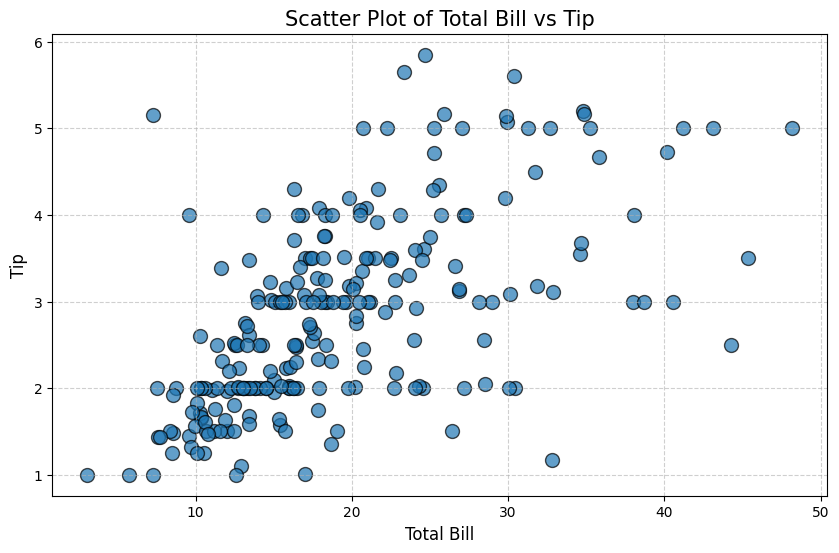

In [15]:
# Let's again create scatter plot after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['total_bill'], df_filtered['tip'], cmap='viridis', s=100, alpha=0.7, edgecolor='black')
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.title('Scatter Plot of Total Bill vs Tip', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Now our data is ready for model building

## Model Building

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [17]:
X = df_filtered.drop('total_bill', axis=1)
y = df_filtered['total_bill']

In [18]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

## Model Evaluation

In [20]:
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score : ', metrics.r2_score(y_test, y_pred))

Mean Squared Error :  41.34076307544376
R2 Score :  0.5086815693442428


In [21]:
# compare predicted values vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Comparison of actual and predicted values:")
print(comparison)

Comparison of actual and predicted values:
     Actual  Predicted
230   24.01  22.486452
104   20.92  20.325219
222    8.58   9.817480
197   43.11  30.453792
140   17.47  17.224080
237   32.83  13.994601
153   24.55  20.391642
109   14.31  22.667428
149    7.51  12.799543
95    40.17  32.947755
142   41.19  31.143146
107   25.21  23.960514
139   13.16  14.828428
161   12.66  16.148081
110   14.00  17.242247
8     15.04  14.423211
74    14.73  14.320117
221   13.42  17.354000
129   22.82  16.294831
5     25.29  29.047932
188   18.15  24.493593
45    18.29  17.745182
163   13.81  14.550979
100   11.35  19.617253
128   11.38  12.432776
119   24.08  21.212105
38    18.69  17.958578
176   17.89  17.148725
187   30.46  25.909718
229   22.12  19.089920
12    15.42  13.177472
181   23.33  28.807565
156   48.17  35.814913
225   16.27  14.223681
92     5.75  14.825948
150   14.07  16.148081
223   15.98  16.143369
18    16.97  21.895847
15    21.58  20.683849
57    26.41  12.084175
7     26.88  2

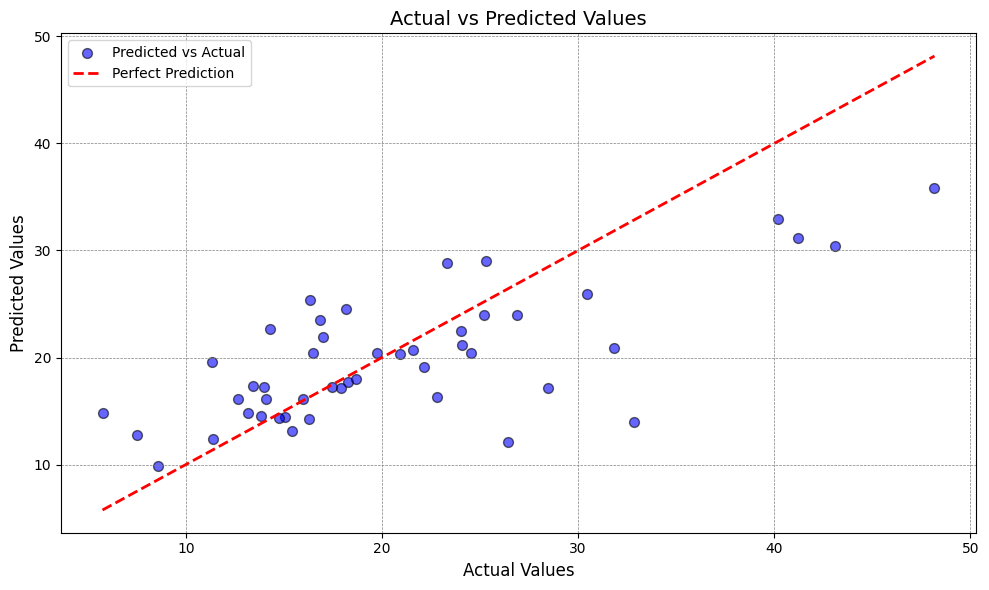

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='black', s=50, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
